In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("./revised_kddcup_dataset.csv",index_col=0)

In [11]:
udp_df = df[df.loc[:,"protocol_type"] == "udp"]

In [12]:
udp_df.to_csv("udp_attack.csv")

In [13]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [15]:
service_values = np.unique(udp_df.loc[:,"service"])
mid = (len(service_values)+1)/2
for i in range(len(service_values)):
    udp_df = udp_df.replace(service_values[i], (i-mid)/10)

In [16]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [17]:
features = ["service","src_bytes","dst_bytes","wrong_fragment","count","num_compromised","srv_count","dst_host_srv_count","dst_host_diff_srv_rate"]
target = "result"

In [18]:
X = udp_df.loc[:,features]
y = udp_df.loc[:,target]

In [19]:
classes = np.unique(y)
print(classes)

['multihop.' 'normal.' 'saint.' 'satan.' 'snmpgetattack.' 'snmpguess.'
 'teardrop.' 'udpstorm.']


In [20]:
#replacing all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if i == 1:
        udp_df = udp_df.replace(classes[i], 0)
    else:
        udp_df = udp_df.replace(classes[i], 1)

#turning the service attribute to categorical values
udp_df=udp_df.replace("eco_i",-0.1)
udp_df=udp_df.replace("ecr_i",0.0)
udp_df=udp_df.replace("tim_i",0.1)
udp_df=udp_df.replace("urp_i",0.2)

In [21]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
y = udp_df.loc[:,target]

In [25]:
rs = RandomForestClassifier()
rs.fit(X,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

dst_bytes                 0.296126
src_bytes                 0.247187
srv_count                 0.138347
dst_host_srv_count        0.116062
service                   0.108886
count                     0.076844
dst_host_diff_srv_rate    0.016291
wrong_fragment            0.000258
num_compromised           0.000000
dtype: float64


D:\Users\karti\Anaconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
X = X.loc[:,["dst_bytes","service","src_bytes","dst_host_srv_count","count"]

,dst_bytes,service,src_bytes,dst_host_srv_count,count
0,146,0.0,105,254,1
1,146,0.0,105,254,1
2,146,0.0,105,254,1
3,146,0.0,105,254,2
4,146,0.0,105,254,2
5,146,0.0,105,255,2
6,0,-0.3,29,3,2
7,146,0.0,105,253,1
8,146,0.0,105,254,2
10,146,0.0,105,254,2


In [29]:
print(list(X.loc[32,:])) #5 input

[146.0, 0.0, 105.0, 254.0, 2.0]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [25]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","ID3"]
scores = []

In [26]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

D:\Users\karti\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of the model is:  70.98988890275871
Confusion Matrix:
 [[2852 2005]
 [ 319 2835]]
Report:
               precision    recall  f1-score   support

           0       0.90      0.59      0.71      4857
           1       0.59      0.90      0.71      3154

   micro avg       0.71      0.71      0.71      8011
   macro avg       0.74      0.74      0.71      8011
weighted avg       0.78      0.71      0.71      8011


==============***===============
Accuracy of the model is:  74.43515166645862
Confusion Matrix:
 [[4046  811]
 [1237 1917]]
Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      4857
           1       0.70      0.61      0.65      3154

   micro avg       0.74      0.74      0.74      8011
   macro avg       0.73      0.72      0.72      8011
weighted avg       0.74      0.74      0.74      8011


==============***===============
Accuracy of the model is:  71.22706278866559
Confusion Matrix:
 [[4826   31]
 

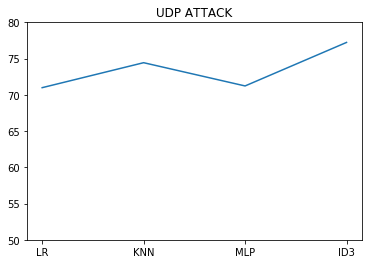

In [27]:
plt.plot(classifiers,scores)
plt.title("UDP ATTACK")
plt.ylim(50,80)
plt.show()